In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('PRSA_Data_Nongzhanguan_20130301-20170228.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


In [5]:
data = data.drop(['station', 'No'], axis=1)

In [6]:
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [7]:
data.wd.unique()

array(['NNW', 'NW', 'N', 'W', 'ENE', 'NE', 'E', 'NNE', 'SW', 'SSW', 'S',
       'WSW', 'ESE', 'SE', 'WNW', 'SSE', nan], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['wd'] = le.fit_transform(data['wd'])

In [9]:
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,6,5.7
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,7,3.9
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,6,5.3
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,3,4.9
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,6,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,7,2.4
35060,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,14,0.9
35061,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,7,1.1
35062,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,6,1.2


In [10]:
data['Datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

In [11]:
data = data.drop(['year', 'month', 'day', 'hour'], axis=1)

In [12]:
data.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
PM2.5,1.000000,0.904115,0.533271,0.689565,0.813926,-0.188672,-0.173368,0.028297,0.097902,-0.022391,-0.151428,-0.301012
PM10,0.904115,1.000000,0.521346,0.676272,0.740188,-0.161575,-0.145583,-0.002099,0.050900,-0.033077,-0.110044,-0.204952
SO2,0.533271,0.521346,1.000000,0.498376,0.568786,-0.190739,-0.359613,0.232694,-0.266988,-0.045475,-0.077246,-0.153507
NO2,0.689565,0.676272,0.498376,1.000000,0.703330,-0.524125,-0.302752,0.129550,-0.019336,-0.052428,-0.179436,-0.469336
CO,0.813926,0.740188,0.568786,0.703330,1.000000,-0.315599,-0.320972,0.151486,-0.019061,-0.013431,-0.218958,-0.340995
O3,-0.188672,-0.161575,-0.190739,-0.524125,-0.315599,1.000000,0.608806,-0.457703,0.314882,0.024120,0.282933,0.312913
TEMP,-0.173368,-0.145583,-0.359613,-0.302752,-0.320972,0.608806,1.000000,-0.837480,0.819070,0.038660,0.149089,0.048835
PRES,0.028297,-0.002099,0.232694,0.129550,0.151486,-0.457703,-0.837480,1.000000,-0.770305,-0.065779,-0.081001,0.038498
DEWP,0.097902,0.050900,-0.266988,-0.019336,-0.019061,0.314882,0.819070,-0.770305,1.000000,0.089356,-0.044438,-0.278933
RAIN,-0.022391,-0.033077,-0.045475,-0.052428,-0.013431,0.024120,0.038660,-0.065779,0.089356,1.000000,-0.015699,0.025551


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   PM2.5     34436 non-null  float64       
 1   PM10      34624 non-null  float64       
 2   SO2       34618 non-null  float64       
 3   NO2       34372 non-null  float64       
 4   CO        33858 non-null  float64       
 5   O3        34558 non-null  float64       
 6   TEMP      35044 non-null  float64       
 7   PRES      35044 non-null  float64       
 8   DEWP      35044 non-null  float64       
 9   RAIN      35044 non-null  float64       
 10  wd        35064 non-null  int32         
 11  WSPM      35050 non-null  float64       
 12  Datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int32(1)
memory usage: 3.3 MB


In [13]:
data1 = data.fillna(-9999)

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   PM2.5     35064 non-null  float64       
 1   PM10      35064 non-null  float64       
 2   SO2       35064 non-null  float64       
 3   NO2       35064 non-null  float64       
 4   CO        35064 non-null  float64       
 5   O3        35064 non-null  float64       
 6   TEMP      35064 non-null  float64       
 7   PRES      35064 non-null  float64       
 8   DEWP      35064 non-null  float64       
 9   RAIN      35064 non-null  float64       
 10  wd        35064 non-null  int32         
 11  WSPM      35064 non-null  float64       
 12  Datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int32(1)
memory usage: 3.3 MB


In [38]:
cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM']

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'Datetime'],
      dtype='object')

In [46]:
data[data['wd'] == 15]

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,Datetime
41,54.0,66.0,51.0,72.0,1200.0,38.0,3.2,1025.3,-16.0,0.0,15,1.3,2013-03-02 17:00:00
91,24.0,38.0,11.0,71.0,700.0,59.0,12.0,1018.5,-13.1,0.0,15,2.7,2013-03-04 19:00:00
139,235.0,258.0,142.0,177.0,3500.0,14.0,8.5,1009.3,-4.4,0.0,15,0.4,2013-03-06 19:00:00
140,235.0,262.0,140.0,173.0,3500.0,14.0,5.8,1009.9,-3.6,0.0,15,0.2,2013-03-06 20:00:00
141,238.0,260.0,139.0,165.0,3700.0,14.0,5.3,1009.4,-4.0,0.0,15,0.7,2013-03-06 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34970,8.0,9.0,7.0,34.0,400.0,46.0,3.3,1020.6,-10.7,0.0,15,1.2,2017-02-25 02:00:00
34971,7.0,9.0,6.0,31.0,400.0,49.0,1.9,1020.0,-9.7,0.0,15,1.2,2017-02-25 03:00:00
34974,4.0,11.0,6.0,43.0,500.0,37.0,1.1,1019.6,-10.1,0.0,15,0.5,2017-02-25 06:00:00
35015,61.0,89.0,16.0,63.0,900.0,25.0,7.6,1019.9,-8.1,0.0,15,1.3,2017-02-26 23:00:00


In [15]:
cols = data1.columns
for j in cols:
    for i in range(0,len(data1)):
        if data1[j][i] == -9999:
            data1[j][i] = data1[j][i-1]
        if data1[j][i] == 16:
            data1[j][i] = data1[j][i-2]

C:\Users\vscse\AppData\Local\Temp/ipykernel_10576/302936103.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[j][i] = data1[j][i-2]
C:\Users\vscse\AppData\Local\Temp/ipykernel_10576/302936103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[j][i] = data1[j][i-1]


In [47]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   PM2.5     35064 non-null  float64       
 1   PM10      35064 non-null  float64       
 2   SO2       35064 non-null  float64       
 3   NO2       35064 non-null  float64       
 4   CO        35064 non-null  float64       
 5   O3        35064 non-null  float64       
 6   TEMP      35064 non-null  float64       
 7   PRES      35064 non-null  float64       
 8   DEWP      35064 non-null  float64       
 9   RAIN      35064 non-null  float64       
 10  wd        35064 non-null  int32         
 11  WSPM      35064 non-null  float64       
 12  Datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int32(1)
memory usage: 3.3 MB


In [16]:
data1.index = data1.Datetime
data1 = data1.drop(['Datetime'], axis=1)

In [17]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(data1,-1,1).eig

array([2.05389896e-01, 1.70551633e-01, 1.38009307e-01, 1.04052721e-01,
       7.68329581e-02, 6.41800692e-02, 5.29226763e-02, 4.23866138e-02,
       3.86122269e-02, 2.68789860e-02, 1.30102193e-03, 5.46912169e-07])

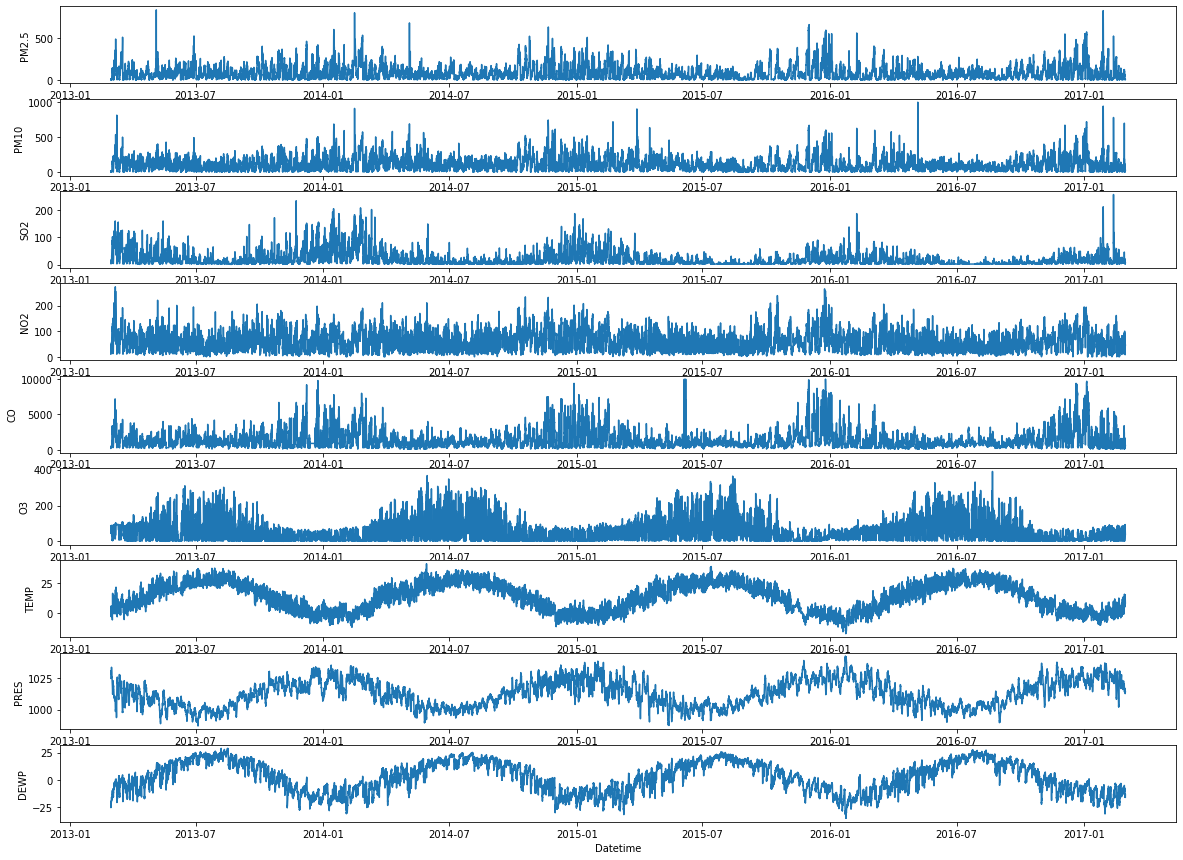

In [18]:
cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']
fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=(20, 15))
for i, col in enumerate(cols):
    ax[i].plot(data1.index, data1[col])
    ax[i].set_ylabel(col)

plt.xlabel('Datetime')
plt.show()

In [72]:
data1.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [20]:
train = data1[:int(0.8*(len(data1)))]
test = data1[int(0.8*(len(data1))):]

from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog=train)
fit_model = model.fit()

prediction = fit_model.forecast(fit_model.y, steps=len(test))

C:\Users\vscse\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\vscse\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [24]:
cols = data1.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,12):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

ValueError: could not convert string to Timestamp

In [31]:
pred

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
2016-05-12 19:00:00,12.576706,24.658608,6.371158,21.783837,127.841048,105.426262,21.260585,1010.769471,-5.552669,0.003288,7.89391,3.586072
2016-05-12 20:00:00,8.476584,27.387788,5.945089,20.218102,69.769902,111.470365,21.10501,1010.643445,-5.428274,-0.001759,8.812886,3.396978
2016-05-12 21:00:00,5.446867,29.637939,5.645057,19.709276,25.75235,115.742324,20.872521,1010.531989,-5.260129,-0.005598,9.243697,3.274883
2016-05-12 22:00:00,3.302162,31.650414,5.430376,19.902071,-5.185256,118.629462,20.586532,1010.43913,-5.066806,-0.006881,9.426557,3.188338
2016-05-12 23:00:00,1.904751,33.559927,5.279871,20.57687,-24.298098,120.394136,20.262188,1010.365987,-4.859098,-0.006165,9.480196,3.120271
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,85.604087,111.121071,20.518933,59.378242,1308.355788,59.235821,13.765127,1012.167846,2.286141,0.057808,6.27673,1.896857
2017-02-28 20:00:00,85.604087,111.121071,20.518933,59.378242,1308.355788,59.235821,13.765127,1012.167846,2.286141,0.057808,6.27673,1.896857
2017-02-28 21:00:00,85.604087,111.121071,20.518933,59.378242,1308.355788,59.235821,13.765127,1012.167846,2.286141,0.057808,6.27673,1.896857
2017-02-28 22:00:00,85.604087,111.121071,20.518933,59.378242,1308.355788,59.235821,13.765127,1012.167846,2.286141,0.057808,6.27673,1.896857


In [30]:
pred.index = pd.date_range('2016-05-12 19:00:00', '2017-02-28 23:00:00', freq='H')

In [21]:
from sklearn.metrics import mean_squared_error
import math
for i in range(len(cols)):
    print('rmse value for', cols[i], 'is : ', math.sqrt(mean_squared_error(prediction[i], test.values[i])))

rmse value for PM2.5 is :  21.27848196342491
rmse value for PM10 is :  67.92786994645475
rmse value for SO2 is :  112.30560685681607
rmse value for NO2 is :  236.58120956997635
rmse value for CO is :  242.12639047751054
rmse value for O3 is :  532.2248236121749
rmse value for TEMP is :  501.93668558299703
rmse value for PRES is :  413.14948687389517
rmse value for DEWP is :  351.13297368183123


In [159]:
model = VAR(endog=data1)
model_fit = model.fit()
fore = model_fit.forecast(model_fit.y, steps=7344)

C:\Users\vscse\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\vscse\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [160]:
cols = data1.columns
pred = pd.DataFrame(index=range(0,len(fore)),columns=[cols])
for j in range(0,12):
    for i in range(0, len(fore)):
        pred.iloc[i][j] = fore[i][j]

In [124]:
data1

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
Datetime,,,,,,,,,,,,
2013-03-01 00:00:00,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,6,5.7
2013-03-01 01:00:00,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,7,3.9
2013-03-01 02:00:00,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,6,5.3
2013-03-01 03:00:00,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,3,4.9
2013-03-01 04:00:00,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,6,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,7,2.4
2017-02-28 20:00:00,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,14,0.9
2017-02-28 21:00:00,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,7,1.1


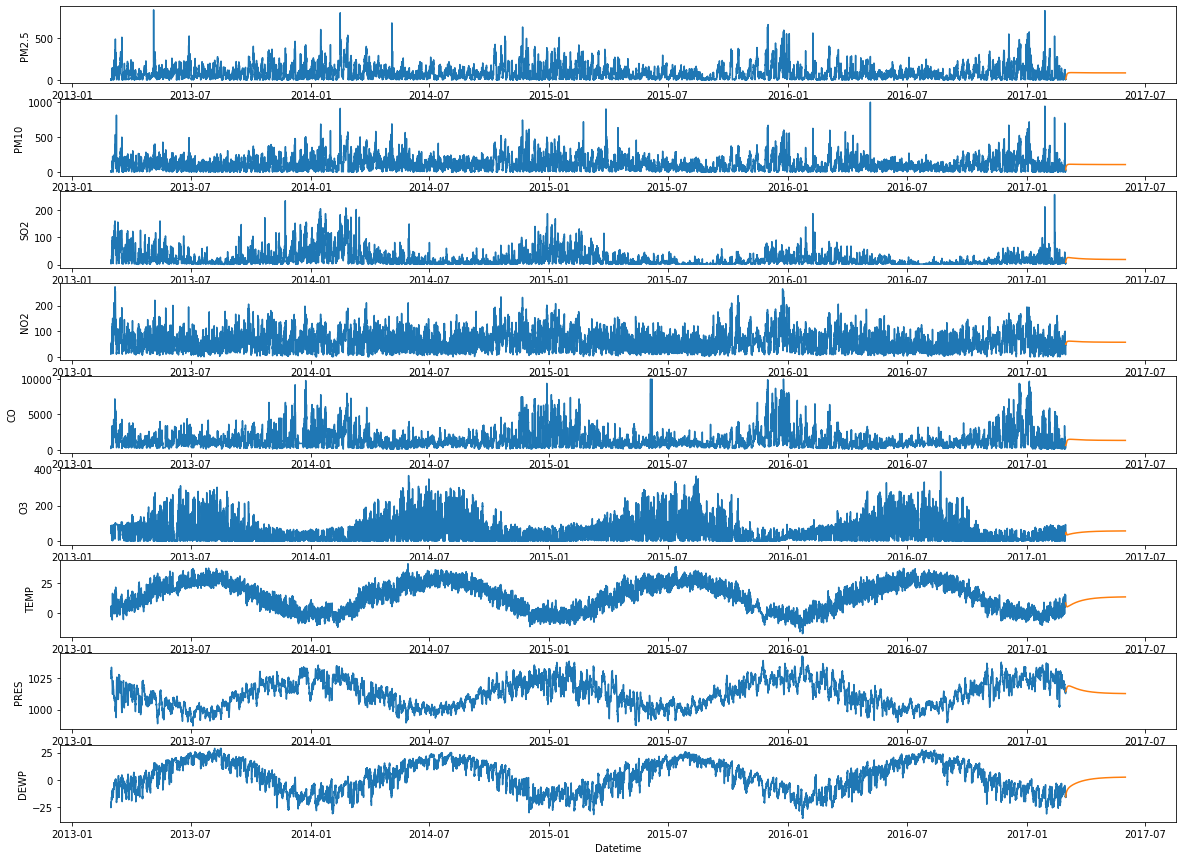

In [165]:
cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']
fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=(20, 15))

for i, col in enumerate(cols):
    ax[i].plot(data1.index, data1[col])
    ax[i].plot(pred.index[:2190], pred[col].iloc[:2190])
    ax[i].set_ylabel(col)

plt.xlabel('Datetime')
plt.show()

In [162]:
len(fore)

7344

In [163]:
pred.index = pd.date_range('2017-03-01', '2017-12-31 23:00:00', freq='H')

In [164]:
pred[col].iloc[:2190]

,DEWP
2017-03-01 00:00:00,-15.578087
2017-03-01 01:00:00,-15.305106
2017-03-01 02:00:00,-15.064272
2017-03-01 03:00:00,-14.845017
2017-03-01 04:00:00,-14.640661
...,...
2017-05-31 01:00:00,2.414423
2017-05-31 02:00:00,2.414765
2017-05-31 03:00:00,2.415106
2017-05-31 04:00:00,2.415447


In [154]:
pred.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-04-01 20:00:00', '2018-04-01 21:00:00',
               '2018-04-01 22:00:00', '2018-04-01 23:00:00',
               '2018-04-02 00:00:00', '2018-04-02 01:00:00',
               '2018-04-02 02:00:00', '2018-04-02 03:00:00',
               '2018-04-02 04:00:00', '2018-04-02 05:00:00'],
              dtype='datetime64[ns]', length=2190, freq='H')

In [161]:
pred

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,11.542553,34.240445,8.214612,50.632978,614.308968,39.730632,8.614321,1014.129302,-15.578087,-0.090143,6.128936,1.770637
1,13.050856,40.009618,9.276059,51.979365,619.562171,41.078397,8.598667,1014.170094,-15.305106,-0.108077,6.807655,2.077192
2,14.530172,45.178769,10.213565,52.561941,620.457647,42.674111,8.558851,1014.21953,-15.064272,-0.103022,7.213493,2.276192
3,16.006686,49.750585,11.051859,52.715836,620.005185,44.296173,8.499447,1014.275969,-14.845017,-0.09246,7.453078,2.404509
4,17.501188,53.777205,11.810138,52.650809,620.022641,45.816591,8.424096,1014.338265,-14.640661,-0.082042,7.590333,2.486134
...,...,...,...,...,...,...,...,...,...,...,...,...
7339,85.302829,109.534233,18.665407,58.157321,1322.276831,58.804398,13.795439,1012.432215,2.592825,0.06466,6.260333,1.859143
7340,85.302829,109.534233,18.665407,58.157321,1322.276831,58.804398,13.795439,1012.432215,2.592825,0.06466,6.260333,1.859143
7341,85.302829,109.534233,18.665407,58.157321,1322.27683,58.804398,13.795439,1012.432215,2.592825,0.06466,6.260333,1.859143
7342,85.302829,109.534233,18.665407,58.157321,1322.27683,58.804398,13.795439,1012.432215,2.592825,0.06466,6.260333,1.859143
